In [47]:
import pandas as pd
!pip install pysentimiento
from pysentimiento import create_analyzer
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:


# Cargar el dataframe
df = pd.read_excel('base vf.xlsx')

In [49]:
# Eliminar valores nulos
df = df.dropna(subset=['Customer_review'])

In [50]:
analyzer_sentiment = create_analyzer(task="sentiment", lang="es")

positivo = []
neutral = []
negativo = []

for texto in df['Customer_review']:

  prediccion_senti = analyzer_sentiment.predict(texto)

  positivo.append(round(prediccion_senti.probas['POS'],2))
  neutral.append(round(prediccion_senti.probas['NEU'],2))
  negativo.append(round(prediccion_senti.probas['NEG'],2))

df['Positivo'] = positivo
df['Neutral'] = neutral
df['Negativo'] = negativo

In [51]:
df['Sentimiento'] = df[['Positivo','Neutral','Negativo']].idxmax(axis=1)

In [52]:
# Guardar el DataFrame resultante en un nuevo archivo Excel
df.to_excel('resultado_transformacion.xlsx', index=False)

In [53]:
# Cargar el dataframe
df = pd.read_excel('resultado_transformacion.xlsx')

In [54]:
print(df.head())

   App Version Code App Version Name customer comment date  Star Rating  \
0               2.0            1.2.3  2019-09-08T16:52:39Z            5   
1               2.0            1.2.3  2019-09-11T15:16:01Z            5   
2               2.0            1.2.3  2019-09-25T15:41:44Z            5   
3               2.0            1.2.3  2019-09-28T01:37:40Z            5   
4               2.0            1.2.3  2019-10-16T11:43:09Z            1   

                                     Customer_review  Positivo  Neutral  \
0  Que chevere, así no podré llamar para aveguria...      0.69     0.30   
1  Excelente opción para conocer los saldos de mi...      0.58     0.41   
2                                 Me parece muy útil      0.96     0.03   
3  Excelente. Ya era hora de poder consultar el s...      0.62     0.35   
4  No me ha sido util por que no da la opcion de ...      0.01     0.26   

   Negativo Sentimiento  
0      0.01    Positivo  
1      0.01    Positivo  
2      0.00    Posit

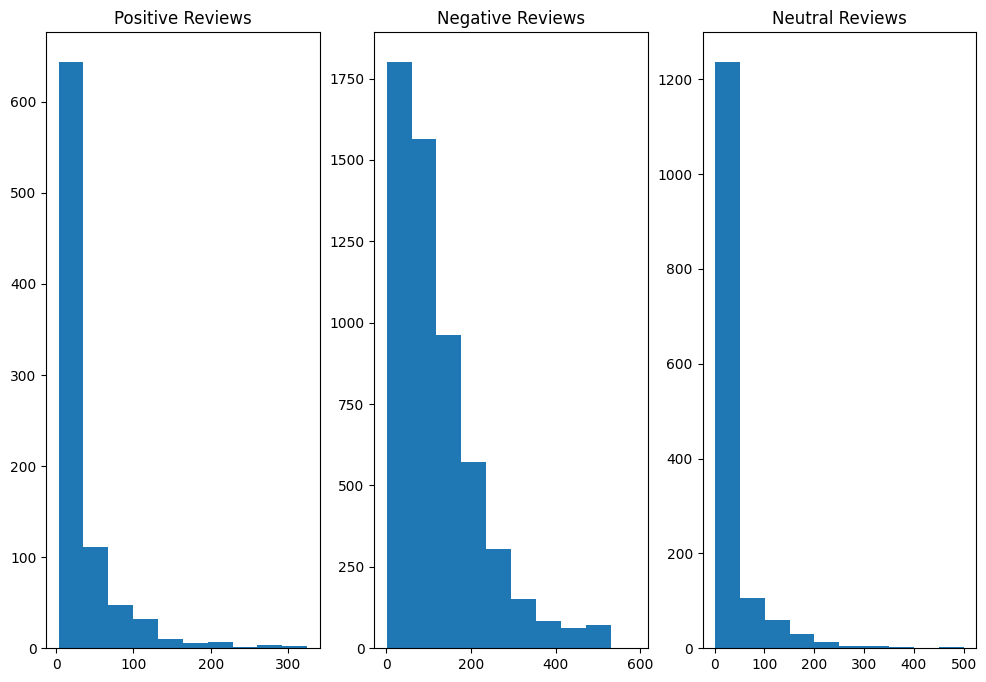

In [67]:
import matplotlib.pyplot as plt

# Tu DataFrame df debe estar definido antes de este código ( NO DICE MUCHO ESTA GRAFICA)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
ax1.hist(df[df['Sentimiento'] == 'Positivo']['Customer_review'].str.len())
ax1.set_title('Positive Reviews')
ax2.hist(df[df['Sentimiento'] == 'Negativo']['Customer_review'].str.len())
ax2.set_title('Negative Reviews')
ax3.hist(df[df['Sentimiento'] == 'Neutral']['Customer_review'].str.len())
ax3.set_title('Neutral Reviews')

plt.show()


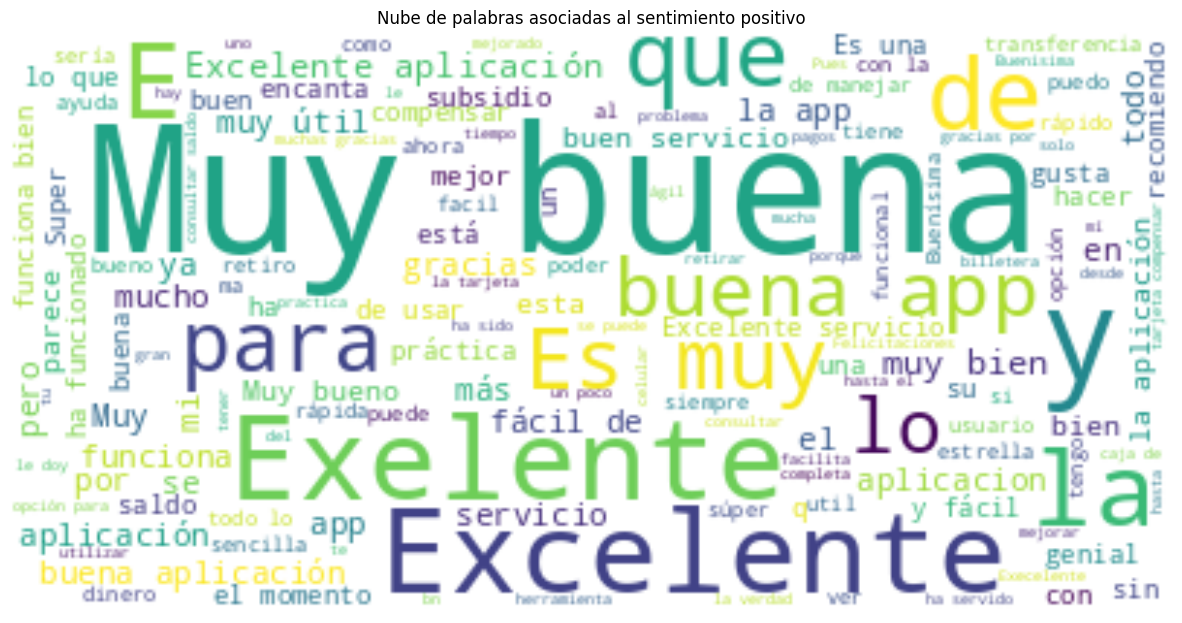

In [68]:
#Nube de palabras sentimiento positivo

text = " ".join(i for i in df[df['Sentimiento']=='Positivo']['Customer_review'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de palabras asociadas al sentimiento positivo')
plt.show()

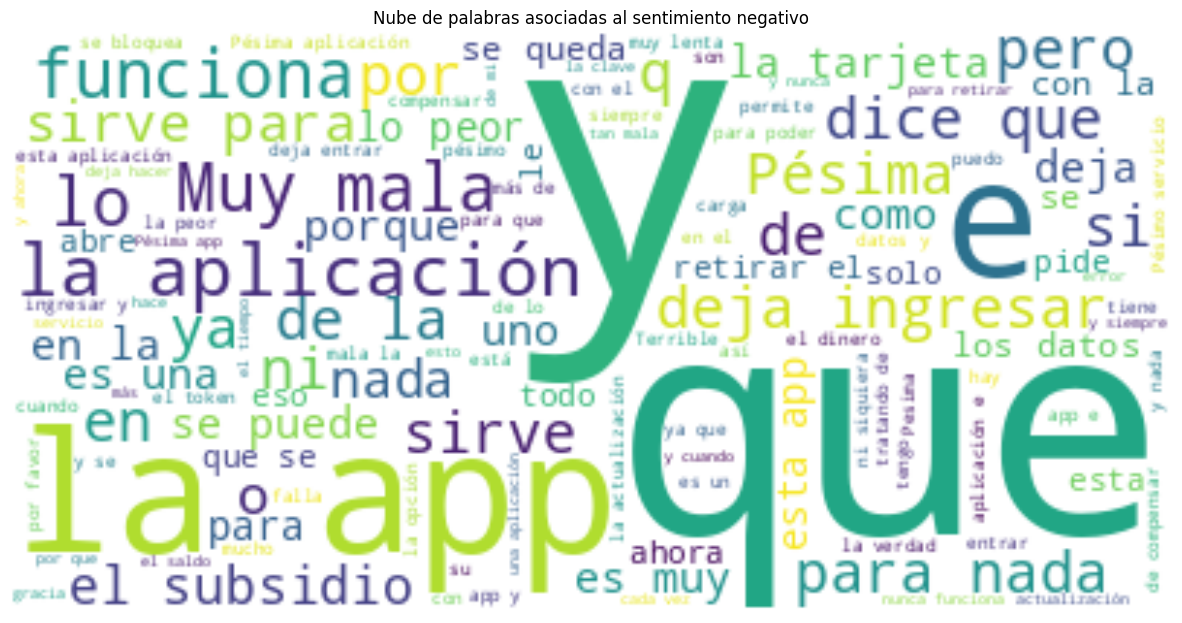

In [69]:
text = " ".join(i for i in df[df['Sentimiento']=='Negativo']['Customer_review'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de palabras asociadas al sentimiento negativo')
plt.show()

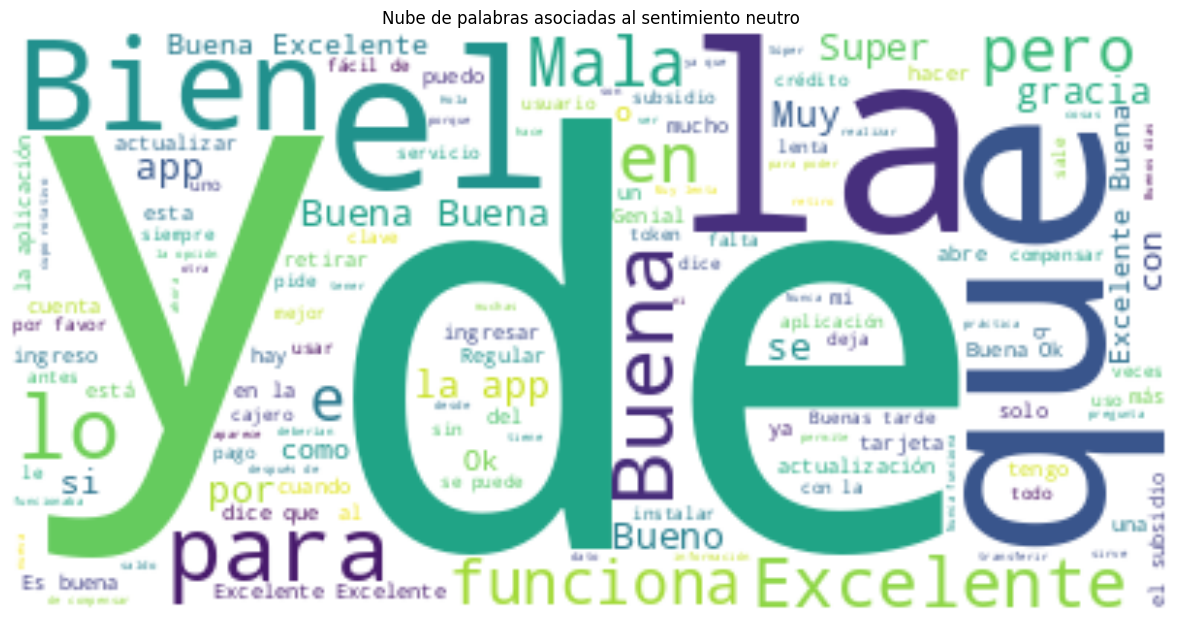

In [70]:
# VALIDAR ESAS PALABRAS NO TIENEN SENTIDO A NEUTRO
text = " ".join(i for i in df[df['Sentimiento']=='Neutral']['Customer_review'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de palabras asociadas al sentimiento neutro')
plt.show()

**Limpieza de Texto**

In [1]:
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
  texto = re.sub(r'\W+', ' ', texto.lower())
  text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)


  tokens = nltk.tokenize.word_tokenize(texto)
  limpio = [t for t in tokens if t not in stop_words]
  return " ".join(limpio)

df['texto_limpio'] = df['Customer_review'].apply(limpiar_texto)

IndentationError: ignored

In [72]:
print(df.head())

   App Version Code App Version Name customer comment date  Star Rating  \
0               2.0            1.2.3  2019-09-08T16:52:39Z            5   
1               2.0            1.2.3  2019-09-11T15:16:01Z            5   
2               2.0            1.2.3  2019-09-25T15:41:44Z            5   
3               2.0            1.2.3  2019-09-28T01:37:40Z            5   
4               2.0            1.2.3  2019-10-16T11:43:09Z            1   

                                     Customer_review  Positivo  Neutral  \
0  Que chevere, así no podré llamar para aveguria...      0.69     0.30   
1  Excelente opción para conocer los saldos de mi...      0.58     0.41   
2                                 Me parece muy útil      0.96     0.03   
3  Excelente. Ya era hora de poder consultar el s...      0.62     0.35   
4  No me ha sido util por que no da la opcion de ...      0.01     0.26   

   Negativo Sentimiento                                       texto_limpio  
0      0.01    Positi

In [2]:
#CONVERTIR A BINARIO PERO TAMBIEN LA COLUMNA SENTIMIENTO O PREDICCION
# Leer el archivo Excel
df = pd.read_excel('resultado_transformacion.xlsx')

# Crear columnas dummificadas para positivo, negativo y neutral
df['Positivo'] = (df['Sentimiento'] == 'Positivo').astype(int)
df['Negativo'] = (df['Sentimiento'] == 'Negativo').astype(int)
df['Neutral'] = (df['Sentimiento'] == 'Neutral').astype(int)

# Eliminar columna original 'prediccion'
df = df.drop('prediccion', axis=1)

# Crear la columna 'Prediccion' que contiene el resultado binario
df['Sentimiento'] = df[['Positivo', 'Negativo', 'Neutral']].idxmax(axis=1).apply(lambda x: 1 if x == 'Positivo' else 0)

print(df)

NameError: ignored